# Machine learning algorithms for classification and regression on iris in Python

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np


# Convert 'iris.data' numpy array to 'iris.dataframe' pandas dataframe
# complete the iris dataset by adding species
iris = datasets.load_iris()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


## 1. splitting the dataset into training and test sets

In [20]:
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
class_names = iris.iloc[:, 5]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7)

## 2. Saving a copy of the different datasets in .csv files

In [21]:
# 2. save entire dataset, training and testing datasets
# save a copy of the dataset in .csv
iris.to_csv('C:/Users/julia/OneDrive/Desktop/github/24. Machine learning toolbox Python/iris.csv', index=False)

iris.to_csv('C:/Users/julia/OneDrive/Desktop/github/24. Machine learning toolbox Python/iris_training.csv',
          index = False)

iris.to_csv('C:/Users/julia/OneDrive/Desktop/github/24. Machine learning toolbox Python/iris_testing.csv',
          index = False)

# 2. Random forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian RF classifier
rf_model = RandomForestClassifier(n_estimators=100)

# fit the model to the iris dataset
rf_model.fit(X_train,y_train)

# make predictions on test set
y_pred=rf_model.predict(X_test)

### 2.2 Confusion matrix and accuracy

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained SVM classifier on the testing set.

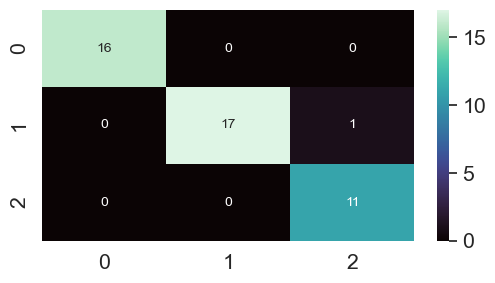

In [56]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred)
cm_rf

df_cm_rf = pd.DataFrame(cm_rf, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_rf, annot=True, annot_kws={"size": 10}, cmap = sns.color_palette("mako", as_cmap=True)) # font size

plt.show()

### Accuracy of the Random forest classifier

In [58]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.18 %
Standard Deviation: 6.58 %


# 4. Support vector machines classifier


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create a SVM model
svm_model = SVC(kernel = 'linear', random_state = 0)

# fit the model to the iris dataset
svm_model.fit(X_train, y_train)

# make predictions on test set
y_pred = svm_model.predict(X_test)

### 4.2 Confusion matrix and accuracy

Now that we have predictions, we can compute a confusion matrix and the accuracy of our trained SVM classifier on the testing set.

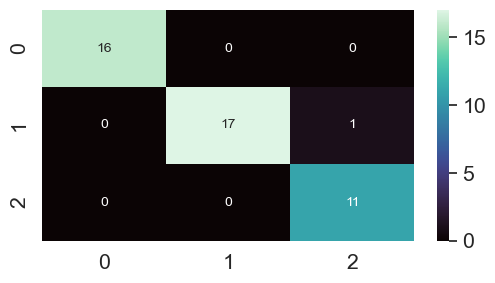

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

df_cm = pd.DataFrame(cm, range(len(class_names.unique())), range(len(class_names.unique())))

plt.figure(figsize=(6,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, cmap = sns.color_palette("mako", as_cmap=True)) # font size

plt.show()

### Accuracy of the SVM classifier

In [34]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = svm_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.00 %
Standard Deviation: 4.00 %
